In [1]:
# Clone the repository
!git clone https://github.com/miladmozafari/SpykeTorch

Cloning into 'SpykeTorch'...
remote: Enumerating objects: 1026, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1026 (delta 9), reused 24 (delta 7), pack-reused 998 (from 1)
Receiving objects: 100% (1026/1026), 6.11 MiB | 30.06 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [2]:
!git clone https://github.com/tiyunes/ETH-80.git

Cloning into 'ETH-80'...
remote: Enumerating objects: 827, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 827 (delta 0), reused 3 (delta 0), pack-reused 824 (from 1)
Receiving objects: 100% (827/827), 77.05 MiB | 22.34 MiB/s, done.


In [3]:
!rm -R ./ETH-80/.git
!rm -R ./ETH-80/.ipynb_checkpoints

rm: cannot remove './ETH-80/.ipynb_checkpoints': No such file or directory


In [4]:
!pip install -r SpykeTorch/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
import SpykeTorch.SpykeTorch.utils as utils

# kernels = [ utils.DoGKernel(3,3,6), utils.DoGKernel(3,6,3),
#     utils.DoGKernel(3,3,9), utils.DoGKernel(3,9,3),
#     # utils.DoGKernel(3,13,26), utils.DoGKernel(3,26,13)
#     ]

# # filter = utils.Filter(kernels, padding = 6, thresholds = 50)
# filter = utils.Filter(kernels, use_abs = True)

kernels = [	utils.GaborKernel(window_size = 3, orientation = 45+22.5),
            utils.GaborKernel(3, 90+22.5),
            utils.GaborKernel(3, 135+22.5),
            utils.GaborKernel(3, 180+22.5)
            ]
filter = utils.Filter(kernels, use_abs = True)

In [6]:
def time_dim(input):
    return input.unsqueeze(0)

In [7]:
import SpykeTorch.SpykeTorch.utils as utils
import SpykeTorch.SpykeTorch.functional as sf
import torchvision.transforms as transforms

transform = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.Grayscale(),
        transforms.ToTensor(),
        time_dim,
        filter,
        sf.pointwise_inhibition,
        utils.Intensity2Latency(number_of_spike_bins = 15, to_spike = True)
    ])

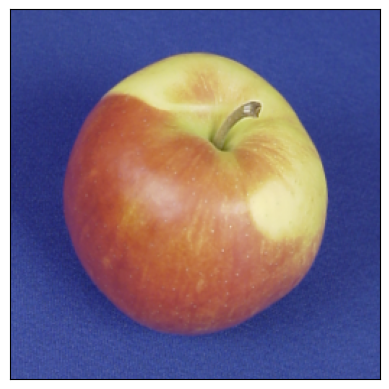

In [9]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import random
import torch

dataset = ImageFolder("ETH-80")
sample_idx = random.randint(0, len(dataset) - 1)

# plotting the sample image
ax = plt.subplot(1,1,1)
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])
plt.xticks([])
plt.yticks([])
plt.imshow(dataset[sample_idx][0])
plt.show()

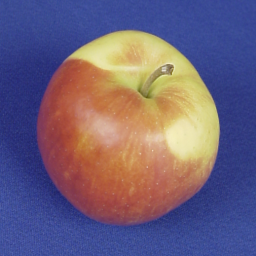

In [10]:
dataset[sample_idx][0]

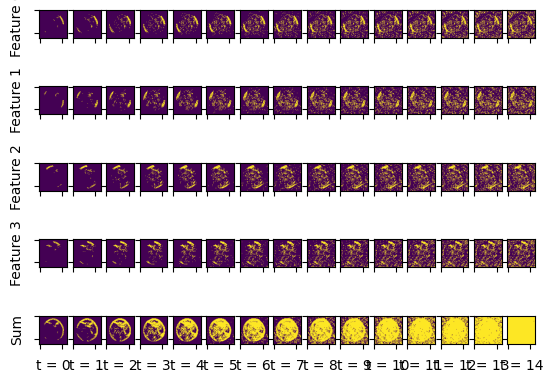

In [12]:
import numpy as np

dataset = ImageFolder("ETH-80", transform)

# plt.style.use('seaborn-white')
plt_idx = 0
sw = dataset[sample_idx][0]
for f in range(4):
    for t in range(15):
        plt_idx += 1
        ax = plt.subplot(5, 15, plt_idx)
        plt.setp(ax, xticklabels=[])
        plt.setp(ax, yticklabels=[])
        if t == 0:
            ax.set_ylabel('Feature ' + str(f))
        plt.imshow(sw[t,f])
        if f == 3:
            ax = plt.subplot(5, 15, plt_idx + 15)
            plt.setp(ax, xticklabels=[])
            plt.setp(ax, yticklabels=[])
            if t == 0:
                ax.set_ylabel('Sum')
            ax.set_xlabel('t = ' + str(t))
            plt.imshow(sw[t].sum(dim=0).numpy())
plt.show()

In [13]:
# splitting training and testing sets
indices = list(range(int(len(dataset))))
random.shuffle(indices)
split_point = int(0.75*len(indices))
train_indices = indices[:split_point]
test_indices = indices[split_point:]
print("Size of the training set:", len(train_indices))
print("Size of the  testing set:", len(test_indices))

Size of the training set: 615
Size of the  testing set: 205


In [14]:


from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler

dataset = utils.CacheDataset(dataset)
train_loader = DataLoader(dataset, sampler=SubsetRandomSampler(train_indices))
test_loader = DataLoader(dataset, sampler=SubsetRandomSampler(test_indices))

In [15]:
import SpykeTorch.SpykeTorch.snn as snn

pool = snn.Pooling(kernel_size = 3, stride = 2)

In [16]:
conv = snn.Convolution(in_channels=4, out_channels=20, kernel_size=30)

In [17]:
stdp = snn.STDP(conv_layer = conv, learning_rate = (0.05, -0.015))

In [18]:
print("Starting Unsupervised Training ...")
for iter in range(30):
    print('\rIteration:', iter, end="")
    for data,_ in train_loader:
        for x in data:
            x = pool(x)
            p = conv(x)
            o, p = sf.fire(p, 20, return_thresholded_potentials=True)
            winners = sf.get_k_winners(p, kwta=1, inhibition_radius=0, spikes=o)
            stdp(x, p, o, winners)
print()
print("Unsupervised Training is Done.")

Starting Unsupervised Training ...
Iteration: 29
Unsupervised Training is Done.


In [19]:
import SpykeTorch.SpykeTorch.visualization as vis
import torch

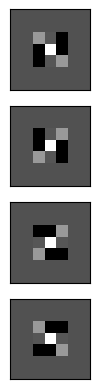

In [29]:
feature = torch.stack([k() for k in kernels])
cstride = (1,1)
# C1 Features #
feature,cstride = vis.get_deep_feature(feature, cstride, (5, 5), (2, 2))
# S2 Features #
# feature,cstride = vis.get_deep_feature(feature, cstride, (30,30), (1,1), conv.weight)

feature_idx = 0
for r in range(4):
    for c in range(1):
        ax = plt.subplot(4, 1, feature_idx+1)
        plt.xticks([])
        plt.yticks([])
        plt.setp(ax, xticklabels=[])
        plt.setp(ax, yticklabels=[])
        plt.imshow(feature[feature_idx].numpy(),cmap='gray')
        feature_idx += 1
plt.show()

In [30]:
train_x_spike = []
train_x_pot = []
train_y = []
for data,targets in train_loader:
    for x,t in zip(data, targets):
        x = pool(x)
        p = conv(x)
        o = sf.fire(p, 20)
        train_x_spike.append(o.reshape(-1).cpu().numpy())
        train_x_pot.append(p.reshape(-1).cpu().numpy())
        train_y.append(t)
train_x_spike = np.array(train_x_spike)
train_x_pot = np.array(train_x_pot)
train_y = np.array(train_y)

In [31]:
test_x_spike = []
test_x_pot = []
test_y = []
for data,targets in test_loader:
    for x,t in zip(data, targets):
        x = pool(x)
        p = conv(x)
        o = sf.fire(p, 20)
        test_x_spike.append(o.reshape(-1).cpu().numpy())
        test_x_pot.append(p.reshape(-1).cpu().numpy())
        test_y.append(t)
test_x_spike = np.array(test_x_spike)
test_x_pot = np.array(test_x_pot)
test_y = np.array(test_y)

In [32]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

clf_spike = LogisticRegression(class_weight='balanced', max_iter=10000)
clf_pot = LogisticRegression(class_weight='balanced', max_iter=100000)

# clf_spike = LinearSVC(max_iter=100000)
# clf_pot = LinearSVC(max_iter=100000)

clf_spike.fit(train_x_spike, train_y)
clf_pot.fit(train_x_pot, train_y)

LogisticRegression(class_weight='balanced', max_iter=100000)

In [33]:
predict_spike = clf_spike.predict(test_x_spike)
predict_pot = clf_pot.predict(test_x_pot)

error_spike = np.abs(test_y - predict_spike).sum()
error_pot = np.abs(test_y - predict_pot).sum()
print("    Spike-based error:", error_spike/len(predict_spike))
print("Potential-based error:", error_pot/len(predict_pot))

    Spike-based error: 0.04390243902439024
Potential-based error: 0.0


Reinforcement Learning

In [34]:
conv.reset_weight()
anti_stdp = snn.STDP(conv_layer = conv, learning_rate = (-0.05, 0.0005))

In [35]:
feature2class = [0] * 10 + [1] * 10
print(feature2class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
print("Starting Reinforcement Learning ...")
for iter in range(30):
    print('\rIteration:', iter, end="")
    for data,targets in train_loader:
        for x,t in zip(data, targets):
            x = pool(x)
            p = conv(x)
            o, p = sf.fire(p, 20, return_thresholded_potentials=True)
            winners = sf.get_k_winners(p, kwta=1, inhibition_radius=0, spikes=o)
            if len(winners) != 0:
                if feature2class[winners[0][0]] == t:
                    stdp(x, p, o, winners)
                else:
                    anti_stdp(x, p, o, winners)
print()
print("Reinforcement Learning is Done.")

Starting Reinforcement Learning ...
Iteration: 29
Reinforcement Learning is Done.


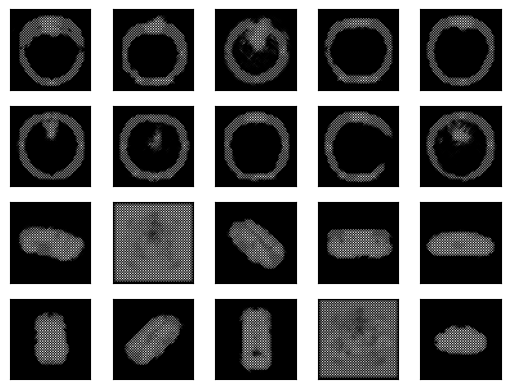

In [37]:
feature = torch.stack([k() for k in kernels])
cstride = (1,1)
# C1 Features #
feature,cstride = vis.get_deep_feature(feature, cstride, (3, 3), (2, 2))
# S2 Features #
feature,cstride = vis.get_deep_feature(feature, cstride, (30,30), (1,1), conv.weight)

feature_idx = 0
for r in range(4):
    for c in range(5):
        ax = plt.subplot(4, 5, feature_idx+1)
        plt.xticks([])
        plt.yticks([])
        plt.setp(ax, xticklabels=[])
        plt.setp(ax, yticklabels=[])
        plt.imshow(feature[feature_idx].numpy(),cmap='gray')
        feature_idx += 1
plt.show()

In [38]:
error = 0
silent = 0
total = 0
count = 0
for data,targets in test_loader:
    for x,t in zip(data, targets):
        total += 1
        x = pool(x)
        p = conv(x)
        o, p = sf.fire(p, 20, return_thresholded_potentials=True)
        winners = sf.get_k_winners(p, kwta=1, inhibition_radius=0, spikes=o)
        # print(winners[0])
        count += 1
        if len(winners) != 0:
            if feature2class[winners[0][0]] != t:
                error += 1
        else:
            silent += 1
print("         Error:", error/total)
print("Silent Samples:", silent/total)

         Error: 0.03414634146341464
Silent Samples: 0.0
